In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, linregress

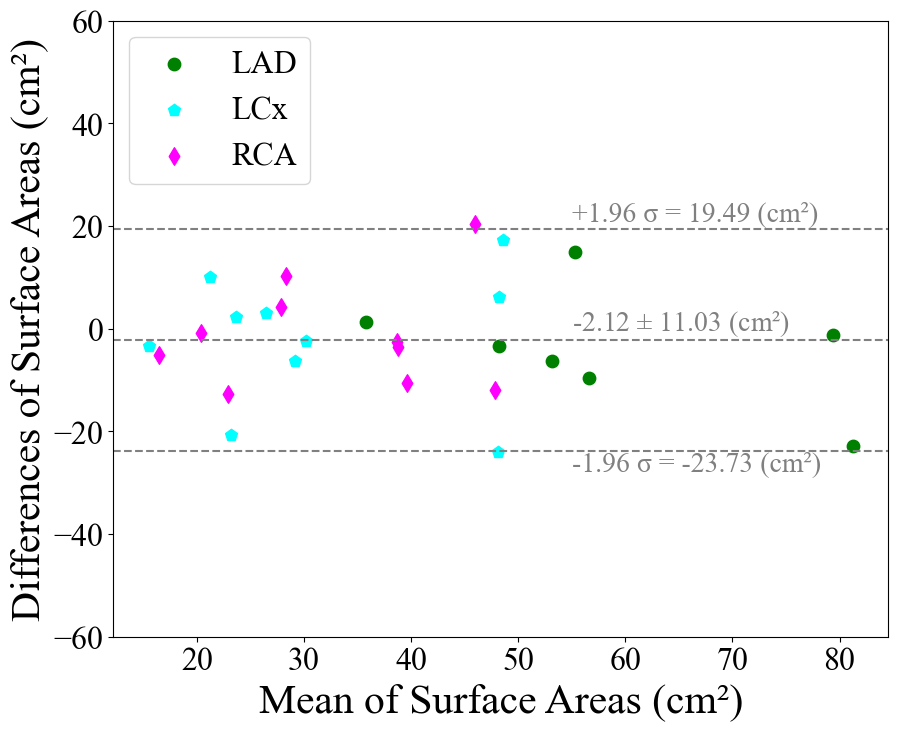

In [7]:
# Bland-Altman

surface_territory = np.array([47.74, 40.51, 24.97, 17.17, 25.72, 22.51, 80.07, 29.22, 35.74, 56.28, 32.3, 35.11, 39.9, 33.56, 60.12, 31.37, 39.97, 45.08, 61.39, 92.65, 18.97, 53.79, 44.9, 23.14, 49.94, 20.76, 16.2])
surface_ischemic = np.array([62.77, 36.97, 27.94, 13.74, 30.01, 24.82, 78.75, 16.54, 56.23, 49.94, 25.98, 36.38, 37.37, 12.81, 36.17, 28.97, 57.18, 51.28, 51.87, 69.88, 13.84, 41.84, 34.39, 33.42, 46.5, 20.01, 26.18])

xlabel, ylabel = ("Mean of Surface Areas (cm\u00b2)", "Differences of Surface Areas (cm\u00b2)")
font1 = {'color':'black','size':30, 'family':'Times New Roman'}
font2 = {'family':'serif','color':'black','size':15}

RCA_ter = np.array([40.51, 25.72, 29.22, 35.74, 39.9, 18.97, 53.79, 44.9, 23.14, 20.76])
RCA_isc = np.array([36.97, 30.01, 16.54, 56.23, 37.37, 13.84, 41.84, 34.39, 33.42, 20.01])
mean_RCA = np.mean([RCA_isc, RCA_ter], axis = 0)
diff_RCA = RCA_isc - RCA_ter

LCx_ter = np.array([24.97, 17.17, 22.51, 32.30, 33.56, 60.12, 31.37, 39.97, 45.08, 16.2])
LCx_isc = np.array([27.94, 13.74, 24.82, 25.98, 12.81, 36.17, 28.97, 57.18, 51.28, 26.18])
mean_LCx = np.mean([LCx_isc, LCx_ter], axis = 0)
diff_LCx = LCx_isc - LCx_ter

LAD_ter = np.array([47.74, 80.07, 56.28, 35.11, 61.39, 92.65, 49.94])
LAD_isc = np.array([62.77, 78.75, 49.94, 36.38, 51.87, 69.88, 46.5])
mean_LAD = np.mean([LAD_isc, LAD_ter], axis = 0)
diff_LAD = LAD_isc - LAD_ter

A = np.asarray(surface_ischemic)
B = np.asarray(surface_territory)
mean = np.mean([A, B], axis = 0)
diff = A - B
md = np.mean(diff) # Mean of difference
sd = np.std(diff, axis = 0) #standard deviation of difference

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

plt.figure(figsize=(10,8))


#plt.scatter(mean, diff)
plt.scatter(mean_LAD, diff_LAD, color = 'green', label = "LAD", s=80)
plt.scatter(mean_LCx, diff_LCx, color = 'cyan', label = "LCx", marker = "p", s=80)
plt.scatter(mean_RCA, diff_RCA, color = 'magenta', label = "RCA", marker = 'd', s=80)

loa_upper = md + 1.96*sd
loa_lower = md - 1.96*sd

plt.text(55, loa_upper + 0.2, f'+1.96 σ = {loa_upper:.2f} (cm\u00b2)', color='gray', va='bottom', fontsize = 20)
plt.text(55, loa_lower - 0.2, f'-1.96 σ = {loa_lower:.2f} (cm\u00b2)', color='gray', va='top',  fontsize = 20)
plt.text(55, md + 0.2, f'{md:.2f} $\pm$ {sd:.2f} (cm\u00b2)', color='gray', va='bottom',  fontsize = 20)


plt.axhline(md, color='gray', linestyle='--')
plt.axhline(loa_upper, color='gray', linestyle='--')
plt.axhline(loa_lower, color='gray', linestyle='--')
plt.xlabel(xlabel, fontdict=font1)
plt.ylabel(ylabel, fontdict=font1)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.ylim(-60, 60)
plt.legend(loc='upper left', fontsize = 23)
#plt.title("Bland Altman")
plt.show()


0.8099522106326863 3.081107209148515e-07


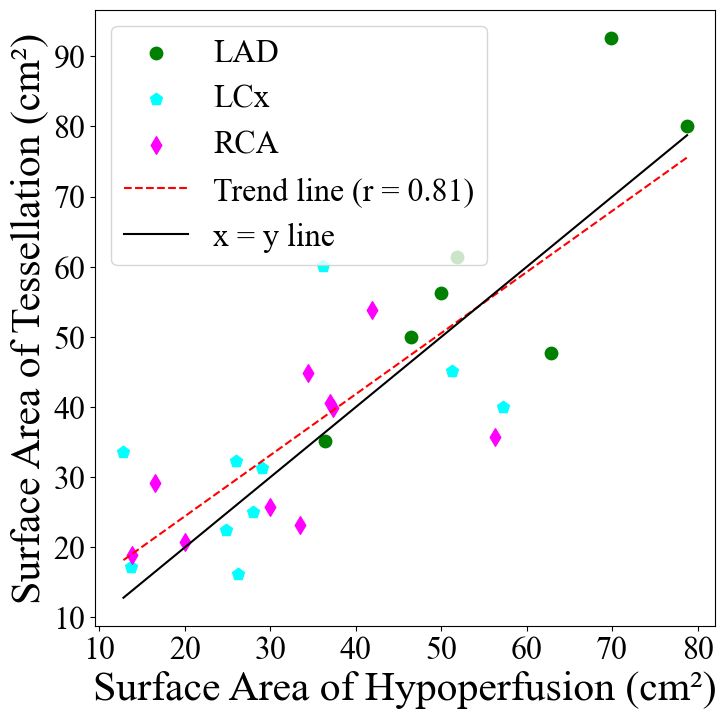

In [8]:
#Scatter Plot

x, y = (surface_ischemic, surface_territory)
xlabel, ylabel = ("Surface Area of Hypoperfusion (cm\u00b2)", "Surface Area of Tessellation (cm\u00b2)")

r_surface, p_value_surface = pearsonr(surface_territory, surface_ischemic)
print(r_surface, p_value_surface)

slope, intercept, _, _, _ = linregress(x, y)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept

# Plot scatter plot
plt.figure(figsize=(8,8))
#sns.scatterplot(x=x, y=y, color='red')#, label="Data points")
plt.scatter(x=LAD_isc, y=LAD_ter, color='green', label="LAD", s=80)
plt.scatter(x=LCx_isc, y=LCx_ter, color='cyan', label="LCx", marker = "p", s=80)
plt.scatter(x=RCA_isc, y=RCA_ter, color='magenta', label="RCA", marker = "d", s=80)
plt.rcParams['font.family'] = 'Times New Roman'
# Plot trend line
plt.plot(x_fit, y_fit, 'r--', label=f"Trend line (r = {r_surface:.2f})")

# Plot x = y line
plt.plot(x_fit, x_fit, 'k-', label="x = y line")

# Labels and title
plt.xlabel(xlabel, fontdict= font1)
plt.ylabel(ylabel, fontdict= font1)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
#plt.title(title)
plt.legend(fontsize = 23)
#plt.grid()
#plt.text(0.02, 0.95, f"p = {p:.4f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
#plt.text(0.02, 0.88, f"r = {r:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


# Show plot
plt.show()
